# Introduction to Machine Learning with R

In [1]:
# The core tidyverse includes the packages that you’re likely to use in everyday data analyses : ggplot2, dplyr, tidyr, ...
suppressMessages(library("tidyverse"))
# The caret package (short for Classification And REgression Training) is a set of functions that attempt to streamline the process for creating predictive models. The package contains tools for:
# data splitting, pre-processing, feature selection, model tuning using resampling, variable importance estimation
suppressMessages(library("caret"))
# Functions for latent class analysis, short time Fourier transform, fuzzy clustering, support vector machines, shortest path computation, bagged clustering, naive Bayes classifier, generalized k-nearest neighbour ...
# Used by Caret to launch model prediction
suppressMessages(library("e1071"))
# allows to use random forest modelling in Caret
suppressMessages(library("randomForest"))

# Machine Learning on "Organ" variable

## Prepare matrix for Machine Learning

### Transpose the matrix and merge gene counts matrix with metadata (Organ information only) 

In [2]:
# for machine learning, you need the variables (the genes) in columns and the samples in rows so we do the transpose
load("../../data/gene_counts_matrix_715samplesx3000genes.RData")
load("../../data/metadata.RData")

reduced_mostVar_t=t(reduced_mostVar)
head(reduced_mostVar_t)

# and then we add a new column containing the organ to which each sample belongs
reduced_mostVar_t_ML <- merge(reduced_mostVar_t,subset_metadata[,c("File_name","Organ")], by.x="row.names", by.y="File_name") %>%  column_to_rownames(var="Row.names")
dim(reduced_mostVar_t_ML) 
head(reduced_mostVar_t_ML)

# reduced_mostVar_t_ML=merge(reduced_mostVar_t,subset_metadata, by.x="row.names", by.y="File_name")
# write_feather(total_matrix_ML,"RPKN_counts_715_samples_3000_most_var_genes.feather")

Vitvi03g01899 Vitvi13g00384 Vitvi19g01871 Vitvi04g01368
SRR866544   908525.78     777.48094     2074.73      243.3841     
SRR866569  1841344.54    5390.64241    49074.79       68.8470     
SRR1502871   40150.08     131.23802    44454.34       79.3388     
SRR1502876   65514.79     362.97315    83775.02      119.3846     
SRR1502878   37497.36      96.43907    52761.58      207.8096     
SRR1502880   23781.41      89.13439    92891.11      224.8213     
           Vitvi17g00320 Vitvi03g01371 Vitvi13g00943 Vitvi12g02209
SRR866544   12711.53      4480.311      80053.499    168.72997    
SRR866569   16513.21      9076.965     156466.943    235.43397    
SRR1502871 244032.47      6279.210       9194.223     34.54376    
SRR1502876 303882.30     22031.130      20192.503     83.74479    
SRR1502878  60091.73     31688.875       6713.023     53.00812    
SRR1502880 104622.21     64514.962       4812.474     42.71191    
           Vitvi01g01476 Vitvi07g01982 ... Vitvi01g00860 Vitvi08g01054
SRR866544   1695.833     1084.16542    ... 339.8665       367.7354    
SRR866569  14607.260     2162.81299    ... 638.7486       647.5274    
SRR1502871 27750.481       62.67516    ... 849.7769       576.3510    
SRR1502876 10930.961      142.44754    ... 582.0945       535.3437    
SRR1502878  6880.484       41.21844    ... 511.2069       940.8576    
SRR1502880  5642.690       28.74136    ... 647.1922      1096.0315    
           Vitvi14g01478 Vitvi13g00279 Vitvi17g00700 Vitvi05g01575
SRR866544  1802.7434     623.8435      1295.0494       45.26090   
SRR866569  1009.2141     600.4961       357.2744       45.61114   
SRR1502871  672.6096     695.9204       262.6111     2167.06843   
SRR1502876  513.0058     601.0883       251.4148      753.53390   
SRR1502878  661.3095     697.2200       171.3800     1581.99793   
SRR1502880  477.7396     735.1171       192.1454      621.50306   
           Vitvi13g00579 Vitvi06g00280 Vitvi16g00151 Vitvi17g01266
SRR866544    93.37288    1347.6823     1036.6862      476.5450    
SRR866569    48.84343    1435.1781     1231.7469      803.0679    
SRR1502871  587.07265     760.4921     1112.5244      578.1350    
SRR1502876 1274.19561     643.6477     1047.6885      774.0229    
SRR1502878 3011.67751     921.8539      942.7374     1052.6114    
SRR1502880 2672.19769     549.5523      753.4267     1178.3451

[1]  715 3001

Vitvi03g01899 Vitvi13g00384 Vitvi19g01871 Vitvi04g01368 Vitvi17g00320
Car_BV     122776.9       97.87488    24247.58306   152.640917     32028.07    
DRR093291 1096688.6      688.51475     1098.21035    38.297990     39740.19    
DRR093292 1032762.4      668.59531       89.28384    21.742821     47827.22    
DRR093293  839285.9      743.82616      118.78315   128.103665     56517.53    
DRR093295  602151.4      709.02356     4313.11235    11.068659    238957.89    
DRR093296 1421755.2     1638.40336     1517.45434     1.532531    206724.23    
          Vitvi03g01371 Vitvi13g00943 Vitvi12g02209 Vitvi01g01476 Vitvi07g01982
Car_BV    9026.1346       2787.221    171.86258      6583.752       58.06895   
DRR093291  881.1715      28762.093    168.19772     18203.650     1641.66681   
DRR093292  663.8136      33168.902    178.33049     13207.928     1317.79743   
DRR093293  434.5595      32230.315     92.16508      6032.874     1592.33752   
DRR093295  485.5605      44173.151    190.78090      1589.082     2527.96681   
DRR093296  546.8678     101973.198    307.45721      2677.272     5291.41046   
          ... Vitvi08g01054 Vitvi14g01478 Vitvi13g00279 Vitvi17g00700
Car_BV    ... 335.2842      1437.094      1584.1787      490.3459    
DRR093291 ... 275.9586      2419.846      1211.2242     1504.1515    
DRR093292 ... 244.4811      2946.478      1278.3293     2285.7546    
DRR093293 ... 255.3506      2379.316      1046.7101     1936.2697    
DRR093295 ... 206.9513      1518.040       363.3201     1965.1204    
DRR093296 ... 219.6676      1440.075       450.0438     1362.5929    
          Vitvi05g01575 Vitvi13g00579 Vitvi06g00280 Vitvi16g00151 Vitvi17g01266
Car_BV     11.80470       9.007338    1208.964      1616.474      989.6107     
DRR093291 103.97677     160.521155    2540.741      2578.511      668.6778     
DRR093292  31.91177     211.069985    3989.888      3341.840      795.5214     
DRR093293  34.18487     281.696158    2761.721      2663.007      682.4089     
DRR093295  83.19607     604.191925    2920.768      2439.104      585.5645     
DRR093296  65.57002     617.815004    2441.765      2832.034      726.8518     
          Organ        
Car_BV    Green berries
DRR093291 Stem         
DRR093292 Stem         
DRR093293 Stem         
DRR093295 Leaves       
DRR093296 Leaves

### Creation of the training dataset (to train the model) and the test dataset (to test the model)

The function createDataPartition() can be used to create a stratified random sample of the data into training and test sets

In [3]:
set.seed(12345)
# estimated proportion of classes
cat("\n\nProportion of samples in each category:\n\n")
prop.table(table(reduced_mostVar_t_ML$Organ))

# Split data into training and test datasets using the createDataPartition() function from the caret package
# with 80% of data in the training dataset and 20% in the test dataset
indxTrain <- createDataPartition(y=reduced_mostVar_t_ML$Organ,p=0.80,list=FALSE)

reduced_mostVar_t_ML_training <- reduced_mostVar_t_ML[indxTrain,]
reduced_mostVar_t_ML_testing <- reduced_mostVar_t_ML[-indxTrain,]

cat("\n\nDimensions of normdata_for_ML_training:\n\n")
dim(reduced_mostVar_t_ML_training)
cat("\n\nDimensions normdata_for_ML_testing :\n\n")
dim(reduced_mostVar_t_ML_testing)

cat("\n\nNumber of samples in each normdata_for_ML_training category :\n\n")
table(reduced_mostVar_t_ML_training$Organ)
cat("\n\nNumber of samples in each normdata_for_ML_testing category :\n\n")
table(reduced_mostVar_t_ML_testing$Organ)



Proportion of samples in each category:




   Green berries Ripening berries           Leaves           Flower 
      0.20979021       0.20979021       0.20979021       0.12447552 
           Shoot             Stem    Inflorescence        Plantlets 
      0.04755245       0.09370629       0.05034965       0.05454545 



Dimensions of normdata_for_ML_training:



[1]  575 3001



Dimensions normdata_for_ML_testing :



[1]  140 3001



Number of samples in each normdata_for_ML_training category :




   Green berries Ripening berries           Leaves           Flower 
             120              120              120               72 
           Shoot             Stem    Inflorescence        Plantlets 
              28               54               29               32 



Number of samples in each normdata_for_ML_testing category :




   Green berries Ripening berries           Leaves           Flower 
              30               30               30               17 
           Shoot             Stem    Inflorescence        Plantlets 
               6               13                7                7 

## KNN with caret

### Metric: cross validation with with N blocks

The trainControl () function is used to set the parameters of the learning process, and
not the method of learning. The nuance is important. In the first case, we
ask for simple learning (with "none" method in trainControl()). Then, we will see that it is possible to make a
modeling associated with an evaluation procedure by resampling technique
(cross validation, "cv"). Under caret, all you have to do is modify the trainControl() function and then restart the modeling process. We ask for cross validation (method = cv) with (number = 5) blocks (folds).

Cross validation at k blocks, "k-fold cross-validation": we divide the original sample into k samples (or "blocks"), then we select one of the k samples as the validation set while the k - 1 other samples constitute the training set. After learning, a validation performance can be calculated. Then the operation is repeated by selecting another validation sample from among the predefined blocks. At the end of the procedure we thus obtain k performance scores, one per block.

Here we test no resampling method "none" and cross validation method "cv"

In [4]:
# fits the model to the entire training set
set.seed(12345)
fitControl_none <- trainControl("none")

In [5]:
# fits the model on the k-1 samples blocks and then evaluate the performance on the validation set
fitControl_cv = trainControl(
  method = "cv", number = 5)

### Gene counts min/max normalisation and KNN model training

Min/max normalization to put values between 0 and 1 (preProcess="range")

The descent gradient, which makes it possible to find the parameters of an optimized model, does not like features (genes) values with too large disparities

Then, model training with the KNN 

In [6]:
# Method : k nearest neighbors
# Train the model with the train set
fitKNN <- train(Organ ~ ., data = reduced_mostVar_t_ML_training, preProcess="range", method = "knn", 
                trControl = fitControl_none)
fitKNN

k-Nearest Neighbors 

 575 samples
3000 predictors
   8 classes: 'Green berries', 'Ripening berries', 'Leaves', 'Flower', 'Shoot', 'Stem', 'Inflorescence', 'Plantlets' 

Pre-processing: re-scaling to [0, 1] (3000) 
Resampling: None 

In [7]:
# Train the model with the train set
fitKNN2 <- train(Organ ~ ., data = reduced_mostVar_t_ML_training, preProcess="range", method = "knn", 
                trControl = fitControl_cv)
fitKNN2

k-Nearest Neighbors 

 575 samples
3000 predictors
   8 classes: 'Green berries', 'Ripening berries', 'Leaves', 'Flower', 'Shoot', 'Stem', 'Inflorescence', 'Plantlets' 

Pre-processing: re-scaling to [0, 1] (3000) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 458, 461, 460, 460, 461 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.8992263  0.8793616
  7  0.8957930  0.8752418
  9  0.8818334  0.8584607

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

### Plot the accuracy for each value of K tested in KNN

The cross validation allowed to automatically select the value of K nearest neighbors generating the best accuracy of the model. This is not the case when we do not use cross validation.

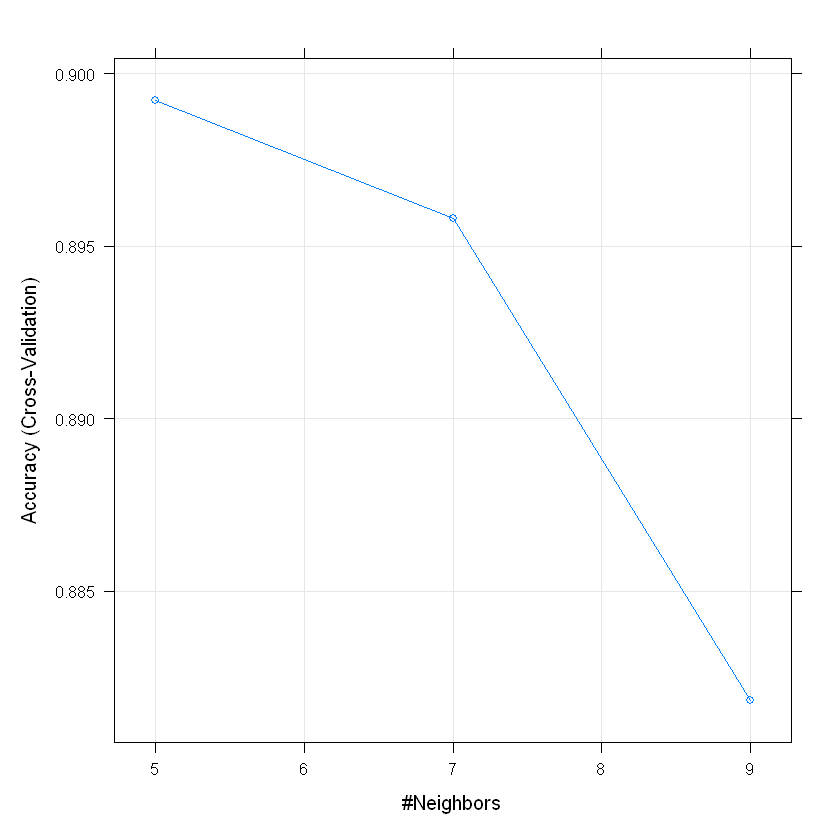

In [8]:
plot(fitKNN2)

### Predict class, find the confusion matrix and calculate accuracy, sensitivity...

To assess the quality of our model, we apply it to the test sample. The command predict() allows to do that.

The confusion matrix materializes the confrontation between the observed and predicted classes. Interpretable indicators (metrics) are deduced from it. We use the confusionMatrix() function to generate these metrics.

The matrix is transposed from the usual presentation. We have the predicted classes in row and the observed class in column. The success rate (accuracy) is 92.86%. The 95% confidence interval is provided.

In [9]:
# Predict class, find the confusion matrix and calculate accuracy, sensitivity...
prediction <- predict(fitKNN2, reduced_mostVar_t_ML_testing)
confusionMatrix(prediction, reduced_mostVar_t_ML_testing$Organ)

Confusion Matrix and Statistics

                  Reference
Prediction         Green berries Ripening berries Leaves Flower Shoot Stem
  Green berries               28                2      0      0     0    0
  Ripening berries             2               28      0      0     0    0
  Leaves                       0                0     28      0     0    0
  Flower                       0                0      0     17     0    0
  Shoot                        0                0      0      0     3    0
  Stem                         0                0      0      0     3   13
  Inflorescence                0                0      0      0     0    0
  Plantlets                    0                0      2      0     0    0
                  Reference
Prediction         Inflorescence Plantlets
  Green berries                0         0
  Ripening berries             0         0
  Leaves                       0         0
  Flower                       1         0
  Shoot              

## Random Forest with caret

In [10]:
# Fit random forest: model
# Set seed
set.seed(12345)
# Fit a model
fitRF <- train(Organ~.,
               data = reduced_mostVar_t_ML_training,
               method = "rf",
               preProcess="range",
               trControl = fitControl_cv
               )
# Let's check the model
fitRF

Random Forest 

 575 samples
3000 predictors
   8 classes: 'Green berries', 'Ripening berries', 'Leaves', 'Flower', 'Shoot', 'Stem', 'Inflorescence', 'Plantlets' 

Pre-processing: re-scaling to [0, 1] (3000) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 459, 461, 460, 460, 460 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
     2  0.9287388  0.9147462
    77  0.9391283  0.9272643
  2999  0.9322021  0.9190129

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 77.

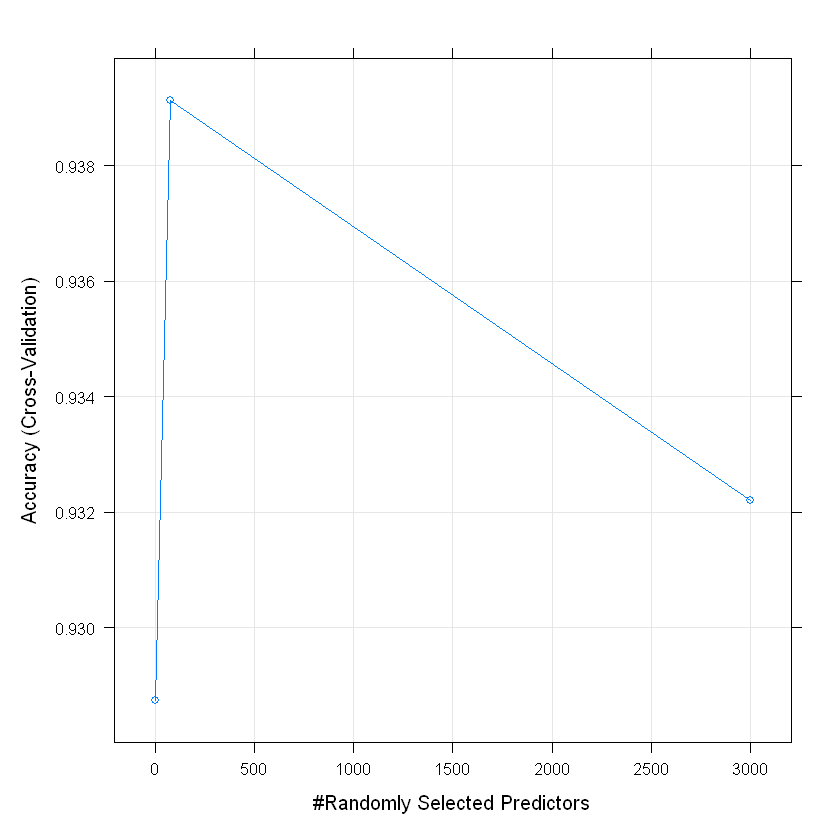

In [11]:
# mtry: The number of features to use to build each tree.
# Plot the results
plot(fitRF)

In [12]:
# Predict class, find the confusion matrix and calculate accuracy, sensitivity...
prediction_RF <- predict(fitRF, reduced_mostVar_t_ML_testing)
confusionMatrix(prediction_RF, reduced_mostVar_t_ML_testing$Organ)

Confusion Matrix and Statistics

                  Reference
Prediction         Green berries Ripening berries Leaves Flower Shoot Stem
  Green berries               27                1      0      0     0    0
  Ripening berries             3               29      0      0     0    0
  Leaves                       0                0     30      0     0    0
  Flower                       0                0      0     17     0    0
  Shoot                        0                0      0      0     3    4
  Stem                         0                0      0      0     3    9
  Inflorescence                0                0      0      0     0    0
  Plantlets                    0                0      0      0     0    0
                  Reference
Prediction         Inflorescence Plantlets
  Green berries                0         0
  Ripening berries             0         0
  Leaves                       1         0
  Flower                       0         0
  Shoot              

### SVM with Caret

By default caret builds the SVM linear classifier using C = 1. C is a tuning parameter, also known as Cost, that determines the possible misclassifications. It essentially imposes a penalty to the model for making an error: the higher the value of C, the less likely it is that the SVM algorithm will misclassify a point.

It’s possible to automatically compute SVM for different values of C and to choose the optimal one that maximize the model cross-validation accuracy.

In [13]:
# Fit SVM : model
# Set seed
# we test 20 C values between 0 and 2
set.seed(12345)
# Fit a model
fitSVM <- train(Organ~.,
               data = reduced_mostVar_t_ML_training,
               method = "svmLinear",
               preProcess="range",
               trControl = fitControl_cv,
               tuneGrid = expand.grid(C = seq(0.0001, 2, length = 20)))
# Let's check the model
fitSVM

Support Vector Machines with Linear Kernel 

 575 samples
3000 predictors
   8 classes: 'Green berries', 'Ripening berries', 'Leaves', 'Flower', 'Shoot', 'Stem', 'Inflorescence', 'Plantlets' 

Pre-processing: re-scaling to [0, 1] (3000) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 459, 461, 460, 460, 460 
Resampling results across tuning parameters:

  C          Accuracy   Kappa    
  0.0001000  0.8678221  0.8409084
  0.1053579  0.9426823  0.9315999
  0.2106158  0.9426823  0.9315999
  0.3158737  0.9426823  0.9315999
  0.4211316  0.9426823  0.9315999
  0.5263895  0.9409280  0.9294937
  0.6316474  0.9409280  0.9294937
  0.7369053  0.9409280  0.9294937
  0.8421632  0.9391888  0.9274179
  0.9474211  0.9409280  0.9294663
  1.0526789  0.9409280  0.9294663
  1.1579368  0.9409280  0.9294663
  1.2631947  0.9409280  0.9294663
  1.3684526  0.9409280  0.9294663
  1.4737105  0.9409127  0.9294340
  1.5789684  0.9409280  0.9294663
  1.6842263  0.9409280  0.9294663
  1.7894842  0.9

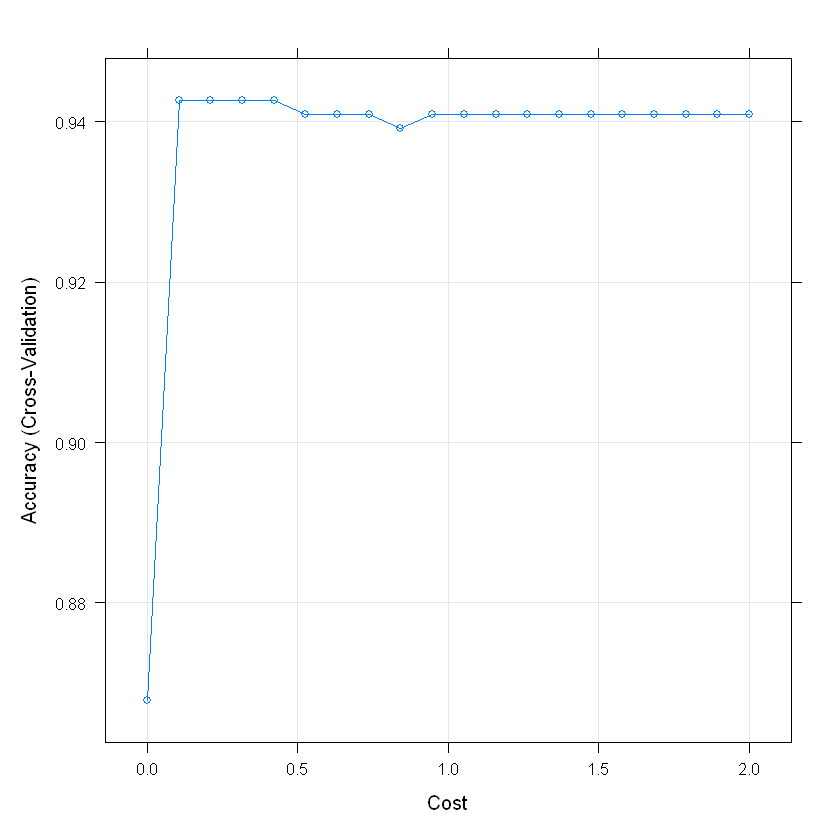

In [14]:
plot(fitSVM)

In [15]:
# Predict class, find the confusion matrix and calculate accuracy, sensitivity...
prediction_SVM <- predict(fitSVM, reduced_mostVar_t_ML_testing)
confusionMatrix(prediction_SVM, reduced_mostVar_t_ML_testing$Organ)

Confusion Matrix and Statistics

                  Reference
Prediction         Green berries Ripening berries Leaves Flower Shoot Stem
  Green berries               30                1      0      0     0    0
  Ripening berries             0               29      0      0     0    0
  Leaves                       0                0     30      0     0    0
  Flower                       0                0      0     17     0    0
  Shoot                        0                0      0      0     3    5
  Stem                         0                0      0      0     3    8
  Inflorescence                0                0      0      0     0    0
  Plantlets                    0                0      0      0     0    0
                  Reference
Prediction         Inflorescence Plantlets
  Green berries                0         0
  Ripening berries             0         0
  Leaves                       1         0
  Flower                       0         0
  Shoot              

## Comparing accuracy of models in Caret


Call:
resamples.default(x = model_list)

Models: knn, rf, svm 
Number of resamples: 5 
Performance metrics: Accuracy, Kappa 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = resamps)

Models: knn, rf, svm 
Number of resamples: 5 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
knn 0.8803419 0.8956522 0.9035088 0.8992263 0.9043478 0.9122807    0
rf  0.9217391 0.9298246 0.9310345 0.9391283 0.9478261 0.9652174    0
svm 0.9137931 0.9217391 0.9561404 0.9426823 0.9565217 0.9652174    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
knn 0.8572300 0.8751696 0.8843600 0.8793616 0.8854478 0.8946006    0
rf  0.9066727 0.9158050 0.9176721 0.9272643 0.9377818 0.9583899    0
svm 0.8973633 0.9066053 0.9474896 0.9315999 0.9481515 0.9583899    0


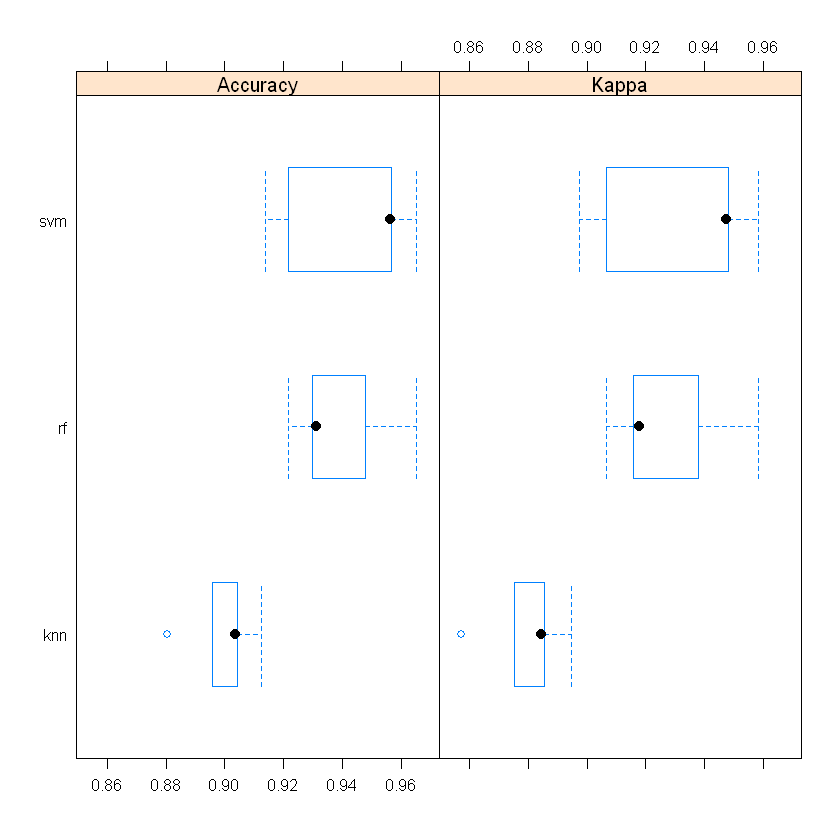

In [16]:
# Make a list containing models to be compared
model_list <- list(
                   knn = fitKNN2,
                   rf = fitRF,
                   svm = fitSVM
                  )

# Collect resamples from the CV folds
resamps <- resamples(model_list)
resamps

# Summarize the results
summary(resamps)

# Box-and-whisker plot
bwplot(resamps)

In [17]:
true_values=0
false_values=0

for (i in c(1:length(reduced_mostVar_t_ML_testing$Organ))){
    if(reduced_mostVar_t_ML_testing$Organ[i] == prediction[i]){
        true_values = true_values + 1
    } else {
       false_values = false_values + 1
    }
}
print(paste(false_values, "false values on a total of",length(reduced_mostVar_t_ML_testing$Organ), "values for KNN" ))

[1] "10 false values on a total of 140 values for KNN"


In [18]:
# organs predicted by random forest on testing dataset
#length(prediction_RF)
# real organs in the testing dataset
#length(reduced_mostVar_t_ML_testing$Organ)

true_values=0
false_values=0

for (i in c(1:length(reduced_mostVar_t_ML_testing$Organ))){
    if(reduced_mostVar_t_ML_testing$Organ[i] == prediction_RF[i]){
        true_values = true_values + 1
    } else {
       false_values = false_values + 1
    }
}
print(paste(false_values, "false values on a total of",length(reduced_mostVar_t_ML_testing$Organ), "values for Random Forest" ))

[1] "12 false values on a total of 140 values for Random Forest"


In [19]:
true_values=0
false_values=0

for (i in c(1:length(reduced_mostVar_t_ML_testing$Organ))){
    if(reduced_mostVar_t_ML_testing$Organ[i] == prediction_SVM[i]){
        true_values = true_values + 1
    } else {
       false_values = false_values + 1
    }
}
print(paste(false_values, "false values on a total of",length(reduced_mostVar_t_ML_testing$Organ), "values for SVM" ))

[1] "10 false values on a total of 140 values for SVM"
